In [2]:
## IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
import seaborn as sns


In [3]:
df=pd.read_csv('resale.csv') ## Loads the dataframe for analysis
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
212254,2025-04,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,61 years 09 months,975000.0
212255,2025-05,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,61 years 09 months,1000000.0
212256,2025-07,YISHUN,EXECUTIVE,824,YISHUN ST 81,04 TO 06,146.0,Maisonette,1987,61 years 05 months,980000.0
212257,2025-05,YISHUN,MULTI-GENERATION,632,YISHUN ST 61,04 TO 06,147.0,Multi Generation,1987,61 years 06 months,945000.0


In [4]:
# Convert 'month' to datetime and extract year/month
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
df['year'] = df['month'].dt.year
df['month_num'] = df['month'].dt.month
df.drop(columns='month', inplace=True)

In [5]:
# Convert 'storey_range' to average storey (e.g., "10 TO 12" -> 11)
def convert_storey_range(range_str):
    try:
        low, high = map(int, range_str.split(' TO '))
        return (low + high) / 2
    except:
        return None

df['storey_avg'] = df['storey_range'].apply(convert_storey_range)
df.drop(columns='storey_range', inplace=True)

In [6]:
# Convert lease_commence_date to remaining lease years
current_year = 2025
df['remaining_lease_years'] = current_year - df['lease_commence_date']
df.drop(columns='lease_commence_date', inplace=True)
df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,remaining_lease,resale_price,year,month_num,storey_avg,remaining_lease_years
0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,44.0,Improved,61 years 04 months,232000.0,2017,1,11.0,46
1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,67.0,New Generation,60 years 07 months,250000.0,2017,1,2.0,47
2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,67.0,New Generation,62 years 05 months,262000.0,2017,1,2.0,45
3,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,68.0,New Generation,62 years 01 month,265000.0,2017,1,5.0,45
4,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,67.0,New Generation,62 years 05 months,265000.0,2017,1,2.0,45
...,...,...,...,...,...,...,...,...,...,...,...,...
212254,YISHUN,EXECUTIVE,828,YISHUN ST 81,146.0,Maisonette,61 years 09 months,975000.0,2025,4,5.0,37
212255,YISHUN,EXECUTIVE,828,YISHUN ST 81,142.0,Apartment,61 years 09 months,1000000.0,2025,5,5.0,37
212256,YISHUN,EXECUTIVE,824,YISHUN ST 81,146.0,Maisonette,61 years 05 months,980000.0,2025,7,5.0,38
212257,YISHUN,MULTI-GENERATION,632,YISHUN ST 61,147.0,Multi Generation,61 years 06 months,945000.0,2025,5,5.0,38


In [7]:
df.corr(numeric_only=True)['resale_price'].sort_values(ascending=False)

resale_price             1.000000
floor_area_sqm           0.578459
year                     0.379492
storey_avg               0.342316
month_num               -0.016166
remaining_lease_years   -0.369234
Name: resale_price, dtype: float64

C:\Users\jay_q\AppData\Local\Temp\ipykernel_23868\1515948158.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['resale_price'], bins=50, kde=True, palette="Set2")


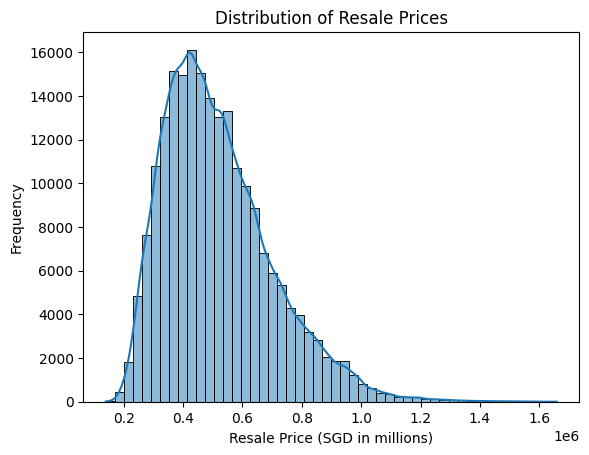

In [8]:
# WHAT IS THE DISTRIBUTION OF RESALE PRICES?

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['resale_price'], bins=50, kde=True, palette="Set2")
plt.title('Distribution of Resale Prices')
plt.xlabel('Resale Price (SGD in millions)')
plt.ylabel('Frequency')
plt.show()


C:\Users\jay_q\AppData\Local\Temp\ipykernel_23868\28804972.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['floor_area_sqm'], bins=50, kde=True, palette="Set2")


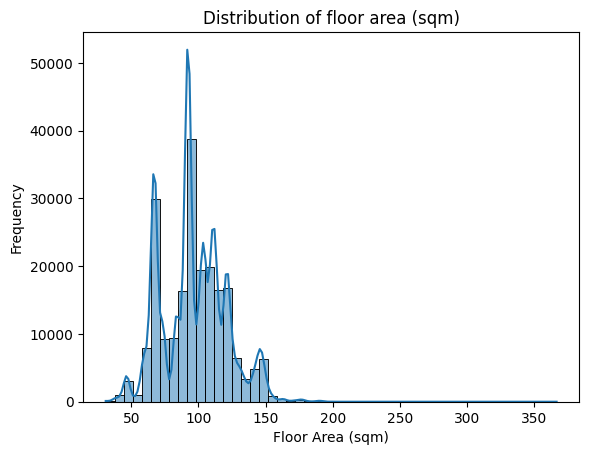

In [ ]:
# WHAT IS THE DISTRIBUTION OF FLOOR AREA SQM FOR FLATS?

sns.histplot(df['floor_area_sqm'], bins=50, kde=True, palette="Set2")
plt.title('Distribution of floor area (sqm)')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Frequency')
plt.show()

C:\Users\jay_q\AppData\Local\Temp\ipykernel_23868\3587873648.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_plot, x="floor_area_sqm", y="resale_price", palette="Set2")


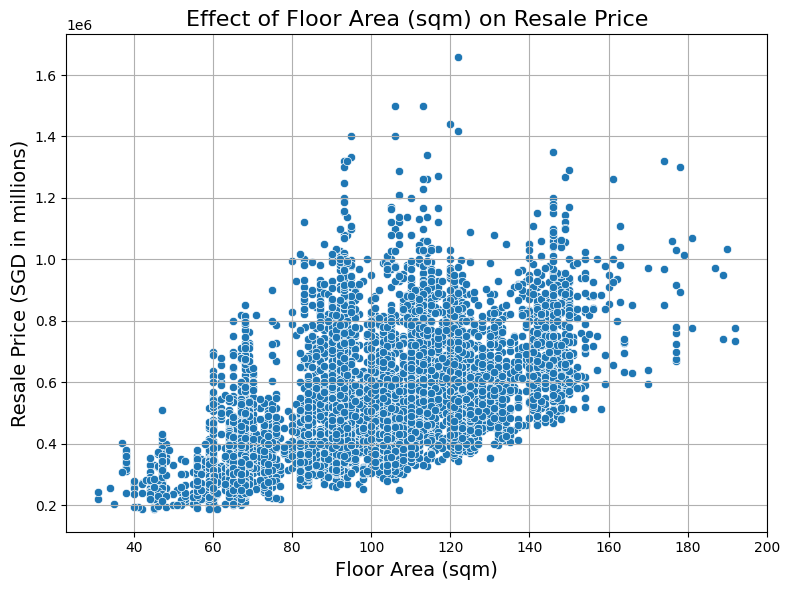

In [10]:
## DOES FLOOR AREA AFFECT RESALE PRICE?

df_plot = df.sample(n=10000, random_state=42)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x="floor_area_sqm", y="resale_price", palette="Set2")
plt.title("Effect of Floor Area (sqm) on Resale Price", fontsize=16)
plt.xlabel("Floor Area (sqm)", fontsize=14)
plt.ylabel("Resale Price (SGD in millions)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\jay_q\AppData\Local\Temp\ipykernel_23868\3871949818.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x="storey_avg", y="resale_price", palette="Set2")


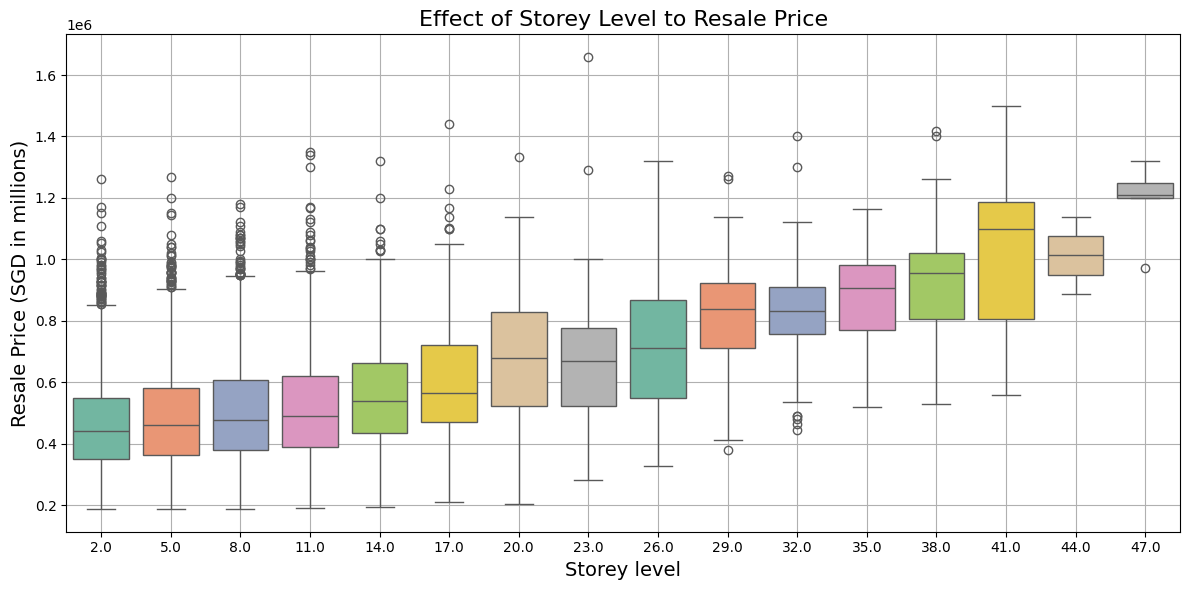

In [11]:
##DOES THE FLOOR LEVEL AFFECT RESALE PRICE?

df_plot = df.sample(n=10000, random_state=42)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_plot, x="storey_avg", y="resale_price", palette="Set2")
plt.title("Effect of Storey Level to Resale Price", fontsize=16)
plt.xlabel("Storey level", fontsize=14)
plt.ylabel("Resale Price (SGD in millions)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
df = df.dropna() ## Drop rows with missing values

In [13]:
df = df.drop(columns=['block', 'street_name', 'remaining_lease']) # Drop unneccessary columns

In [14]:
# Extract dropdown options BEFORE one-hot encoding
town_options = sorted(df['town'].unique().tolist())
flat_type_options = sorted(df['flat_type'].unique().tolist())
flat_model_options = sorted(df['flat_model'].unique().tolist())
year_options = sorted(df['year'].unique().tolist())
remaining_lease_years_options = sorted(df['remaining_lease_years'].unique().tolist())

In [15]:
df = pd.get_dummies(df, columns=['town', 'flat_type', 'flat_model'], drop_first=True)  # OHE columns


In [16]:
## Train-test split
from sklearn.model_selection import train_test_split

X = df.drop('resale_price' , axis=1)
y = df['resale_price' ]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=42)

In [17]:
## This is the baseline R² score in predicting the mean resale price

from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score

dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
print("Baseline R²:", r2_score(y_test, y_pred_dummy))


Baseline R²: -7.868156557400141e-05


Below is the different regression models I tested for their MAE, MSE and R² score and compared them to one another. Remove the commented code

In [18]:
##TRAIN THE LINEAR REGRESSION MODEL
## from sklearn.linear_model import LinearRegression

## lr = LinearRegression()
## lr.fit(X_train, y_train)
## lr

In [19]:
## MAE, MSE and R² for Linear Regression
## from sklearn.metrics import mean_squared_error, r2_score
## from sklearn.metrics import mean_absolute_error

## y_pred_lr = lr.predict(X_test)
## mae_lr = mean_absolute_error(y_test, y_pred_lr)
## mse_lr = mean_squared_error(y_test, y_pred_lr)
## r2_lr = r2_score(y_test, y_pred_lr)

## print("Linear Regression MAE:", mae_lr)
## print("Linear Regression MSE:", mse_lr)
## print("Linear Regression R²:", r2_lr)

In [20]:
##TRAIN DECISION TREE REGRESSOR MODEL
## from sklearn.tree import DecisionTreeRegressor

## dt = DecisionTreeRegressor(random_state=42)
## dt.fit(X_train, y_train)

In [21]:
## MAE, MSE and R² for Decision Tree Regressor
## from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## y_pred_dt = dt.predict(X_test)
## mae_dt = mean_absolute_error(y_test, y_pred_dt)
## mse_dt = mean_squared_error(y_test, y_pred_dt)
## r2_dt = r2_score(y_test, y_pred_dt)

## print("Decision Tree MAE:", mae_dt)
## print("Decision Tree MSE:", mse_dt)
## print("Decision Tree R²:", r2_dt)

In [22]:
##TRAIN GRADIENT BOOSTING REGRESSOR MODEL
## from sklearn.ensemble import GradientBoostingRegressor
## gb = GradientBoostingRegressor(random_state=42)
## gb.fit(X_train, y_train)
## gb

In [23]:
## MAE, MSE and R² for Gradient Boosting Regressor
## y_pred_gb = gb.predict(X_test)
## mae_gb = mean_absolute_error(y_test, y_pred_gb)
## mse_gb = mean_squared_error(y_test, y_pred_gb)
## r2_gb = r2_score(y_test, y_pred_gb)

## print("Gradient Boosting MAE:", mae_gb)
## print("Gradient Boosting MSE:", mse_gb)
## print("Gradient Boosting R²:", r2_gb)


In [24]:
## TRAIN RANDOM FOREST REGRESSOR MODEL
## from sklearn.ensemble import RandomForestRegressor
## rf = RandomForestRegressor(random_state=42)
## rf.fit(X_train, y_train)
## rf

In [25]:
## MAE, MSE and R² for Random Forest Regressor
## y_pred_rf = rf.predict(X_test)
## mae_rf = mean_absolute_error(y_test, y_pred_rf)
## mse_rf = mean_squared_error(y_test, y_pred_rf)
## r2_rf = r2_score(y_test, y_pred_rf)

## print("Random Forest MAE:", mae_rf)
## print("Random Forest MSE:", mse_rf)
## print("Random Forest R²:", r2_rf)

This is a table of the MAE, MSE and R² for different models

![Results of different models](table.png)

From the table, we can see that the MAE and MSE is lowest for Random Forest Regressor.
The R² is also the highest for the Random Forest Regressor.

Conclusion: That means the Random Forest Regressor is the most suitable for predicting the resale price of the HDB flats

In [26]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
model

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_model = model.predict(X_test)
mae_model = mean_absolute_error(y_test, y_pred_model)
mse_model = mean_squared_error(y_test, y_pred_model)
r2_model = r2_score(y_test, y_pred_model)

print("Random Forest MAE:", mae_model)
print("Random Forest MSE:", mse_model)
print("Random Forest R²:", r2_model)

Random Forest MAE: 26344.03847738984
Random Forest MSE: 1486650611.3900602
Random Forest R²: 0.9557887774641862


In [ ]:
model.feature_importances_  # Show feature importances of the model

array([3.93654730e-01, 1.69763922e-01, 1.34834330e-02, 9.24419509e-02,
       8.38265059e-02, 4.78786652e-03, 1.52220220e-02, 3.49686306e-03,
       2.64926446e-02, 5.15392099e-03, 5.12924626e-03, 1.14539897e-02,
       6.77684509e-03, 6.55296892e-03, 9.53331348e-03, 1.79845749e-03,
       3.25186844e-03, 5.96832133e-03, 1.23560558e-02, 3.64543623e-03,
       1.47037737e-03, 1.49102536e-03, 1.83553212e-02, 2.34429949e-03,
       9.31018595e-03, 3.44231736e-03, 4.58219745e-03, 1.29075367e-02,
       8.87920234e-03, 2.41873921e-03, 8.77880859e-03, 2.93318195e-03,
       1.37434246e-02, 1.77241852e-03, 6.47071200e-04, 1.33885717e-05,
       6.79855957e-06, 1.29575692e-04, 3.48570561e-04, 2.02572001e-02,
       2.01502993e-03, 7.35249584e-05, 3.03137038e-04, 4.86070415e-03,
       1.56336564e-04, 3.97752947e-05, 1.12420515e-05, 3.60030423e-04,
       1.42706323e-03, 4.92363917e-05, 4.22143230e-05, 1.16637027e-04,
       6.55250276e-04, 6.88577025e-04, 4.32072464e-04, 1.47167343e-04])

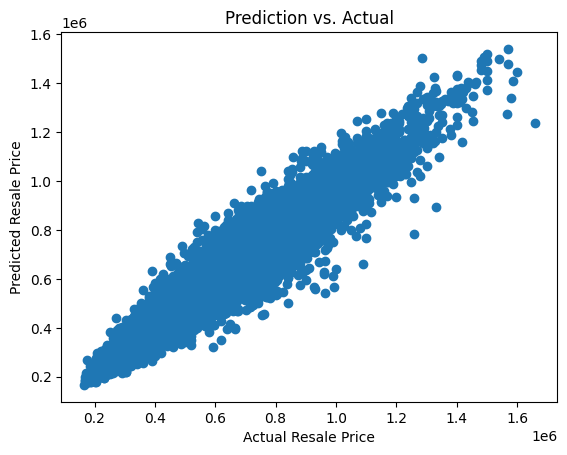

In [ ]:
import matplotlib.pyplot as plt

##Test if the model has learned anything

y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Resale Price")
plt.ylabel("Predicted Resale Price")
plt.title("Prediction vs. Actual")
plt.show()

In [ ]:
df.corr(numeric_only=True)['resale_price'].sort_values(ascending=False)

resale_price                         1.000000
floor_area_sqm                       0.578459
year                                 0.379492
storey_avg                           0.342316
flat_type_EXECUTIVE                  0.313546
flat_type_5 ROOM                     0.305825
flat_model_Maisonette                0.233838
flat_model_Apartment                 0.199873
flat_model_DBSS                      0.190354
town_BISHAN                          0.133094
town_BUKIT MERAH                     0.121805
flat_model_Type S1                   0.117172
town_QUEENSTOWN                      0.101785
flat_model_Type S2                   0.101275
town_CENTRAL AREA                    0.079307
flat_model_Premium Apartment         0.077316
town_BUKIT TIMAH                     0.067217
town_KALLANG/WHAMPOA                 0.063947
flat_model_Model A-Maisonette        0.061264
flat_model_Premium Apartment Loft    0.059840
flat_model_Adjoined flat             0.054543
town_PASIR RIS                    

Below is the code to find the best hyperparamters for the model. (Approx 90 mins to run)

In [ ]:
# ## MODEL HYPERPARAMETER TUNING, FINDS BEST HYPERPARAMETERS FOR THE MODEL

# from sklearn.model_selection import RandomizedSearchCV

# param_dist = {
#    'n_estimators': [100, 200, 300, 400, 500],
#    'max_depth': [3, 4, 5, 6, 7],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'max_features': ['sqrt', 'log2', None]
# }

# random_search = RandomizedSearchCV(     
#     estimator=model,
#     param_distributions=param_dist,
#     n_iter=30,  # Number of random combinations to try
#     cv=5,       # 5-fold cross-validation
#     verbose=2,
#     random_state=42,
#     n_jobs=-1,  # Use all cores
#     scoring='neg_mean_squared_error'
# )

# # Fit the model
# random_search.fit(X_train, y_train)
# # Best hyperparameters
# print("Best Possible Parameters:", random_search.best_params_)
# # Evaluate on test set
# best_model = random_search.best_estimator_
# y_pred = best_model.predict(X_test)
# rmse = np.sqrt(mean_absolute_error(y_test, y_pred))
# print("Test MAE:", rmse)

In [ ]:
##Calculate MAE for Random Forest Regressor after hypertuning

from sklearn.metrics import mean_absolute_error

mae_model = np.sqrt(mean_absolute_error(y_test, y_pred))
print("Random Forest MAE:", mae_model)

Random Forest MAE: 162.30846705390894


In [ ]:
# Hypertuned Random Forest Regressor model and save it as model.pkl
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=7 , random_state=42)
model.fit(X_train, y_train)

import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [ ]:

joblib.dump(town_options, 'town_options.pkl')
joblib.dump(flat_type_options, 'flat_type_options.pkl')
joblib.dump(flat_model_options, 'flat_model_options.pkl')
joblib.dump(year_options, 'year_options.pkl')
joblib.dump(remaining_lease_years_options, 'remaining_lease_years_options.pkl')




joblib.dump(X_train.columns.tolist(), 'model_columns.pkl')


['model_columns.pkl']